<a href="https://colab.research.google.com/github/Mparate1234/Py_stat_DS_ML/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

# k-means clustering    ---------------------------- scratch approach
will never use this method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#    standara preperation for graph
plt.rcParams["font.size"]=14
plt.rcParams["lines.markersize"]=7
plt.rcParams["axes.grid"]=True
plt.rcParams["axes.labelsize"]=16
plt.rcParams["figure.figsize"]=(5,5)

In [3]:
df=pd.DataFrame({
                'Num_flights': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72], 
                 'Avg_fare': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]})
df.head()

,Num_flights,Avg_fare
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54


In [4]:
np.random.seed(200)
k=3
centroids={i+1:[np.random.randint(0,80),np.random.randint(0,80)]
          for i in range(k)}
centroids

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

# plot the graph

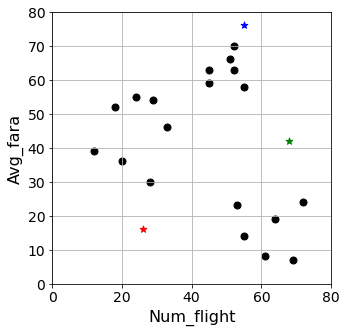

In [5]:
plt.scatter(df['Num_flights'],df['Avg_fare'],color='k')
colmap={1:'r',2:'g',3:'b'}
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color=colmap[i],marker='*')
plt.xlabel('Num_flight')
plt.ylabel('Avg_fara')
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

# calculate the distance and assign to cluster

In [6]:
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]= (
            np.sqrt((df['Num_flights']-centroids[i][0])**2 + (df['Avg_fare'] - centroids[i][1])**2))
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']= df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest']= df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color']=df['closest'].map(lambda x: colmap[x])
    return df

In [7]:
df = assignment(df, centroids)
df.head()

,Num_flights,Avg_fare,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,26.925824,56.080300,56.727418,1,r
1,20,36,20.880613,48.373546,53.150729,1,r
2,28,30,14.142136,41.761226,53.338541,1,r
3,18,52,36.878178,50.990195,44.102154,1,r
4,29,54,38.118237,40.804412,34.058773,3,b


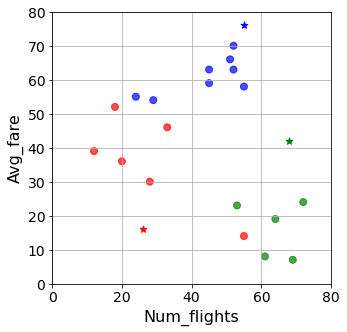

In [8]:
#Plotting the graph for above
plt.scatter(df['Num_flights'], df['Avg_fare'], color=df['color'],alpha=0.7)
for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i],marker='*')
plt.xlim(0,80)
plt.ylim(0,80)
plt.xlabel('Num_flights')
plt.ylabel('Avg_fare')
plt.show()

In [9]:
#making copy of randomly created clusters
import copy
old_c = copy.deepcopy(centroids)
old_c

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

#  Calculate the mean

In [10]:
def update(k):
    for i in k.keys():
        k[i][0] = np.mean(df[df['closest']==i]['Num_flights'])
        k[i][1] = np.mean(df[df['closest']==i]['Avg_fare'])
    return k

In [11]:
#Printing both centroid i.e. first which is created randomly and second one after first iteration
centroids = update(centroids)
print('old centroids',old_c)
print('updated centroids', centroids)


old centroids {1: [26, 16], 2: [68, 42], 3: [55, 76]}
updated centroids {1: [27.666666666666668, 36.166666666666664], 2: [63.8, 16.2], 3: [44.125, 61.0]}


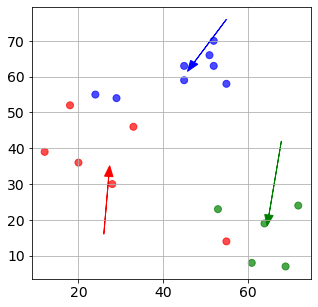

In [12]:

ax = plt.axes()
plt.scatter(df['Num_flights'],df['Avg_fare'], color = df['color'], alpha=0.7)
for i in centroids.keys():
    old_x = old_c[i][0]
    old_y = old_c[i][1]
    dx = (centroids[i][0] - old_c[i][0]) *0.7
    dy = (centroids[i][1] - old_c[i][1]) *0.8
    #Drawing arrow to see the change
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

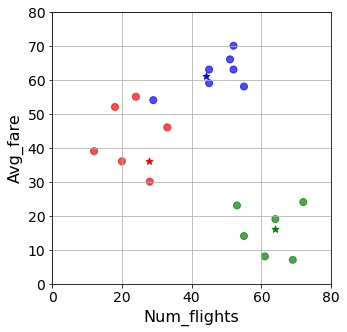

In [13]:
#Repeating same step
df = assignment(df, centroids)
#plotting the results
plt.scatter(df['Num_flights'], df['Avg_fare'], color=df['color'],alpha=0.7)
for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i],marker='*')
plt.xlim(0,80)
plt.ylim(0,80)
plt.xlabel('Num_flights')
plt.ylabel('Avg_fare')
plt.show()

# Continue with same steps until all assigned categories dont change anymore


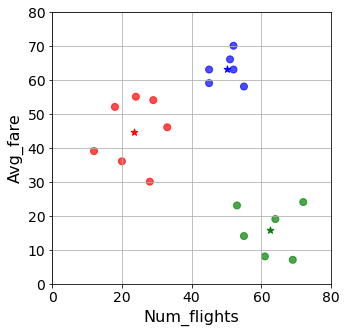

In [14]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
#Plotting the graph
plt.scatter(df['Num_flights'], df['Avg_fare'], color=df['color'],alpha=0.7)
for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i],marker='*')
plt.xlim(0,80)
plt.ylim(0,80)
plt.xlabel('Num_flights')
plt.ylabel('Avg_fare')
plt.show()

In [15]:
centroids

{1: [23.428571428571427, 44.57142857142857],
 2: [62.333333333333336, 15.833333333333334],
 3: [50.0, 63.166666666666664]}

# Implementing K-Means using sklearn

will use this method 

In [16]:
from sklearn.cluster import KMeans


In [17]:
df=pd.DataFrame({
                'Num_flights': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72], 
                 'Avg_fare': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]})
df=df[['Num_flights','Avg_fare']]
df.head()

,Num_flights,Avg_fare
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54


In [18]:
#Instantiated kmeans into a variable
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
labels=kmeans.predict(df)
labels

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [19]:
#This will give cordinates for centroid
sk_centroids = kmeans.cluster_centers_
sk_centroids

array([[62.33333333, 15.83333333],
       [23.42857143, 44.57142857],
       [50.        , 63.16666667]])

In [20]:
#From here we are going to find how to choose correct number of cluster
#This gives us sum of variance for each clusters 
kmeans.inertia_

1624.4285714285716

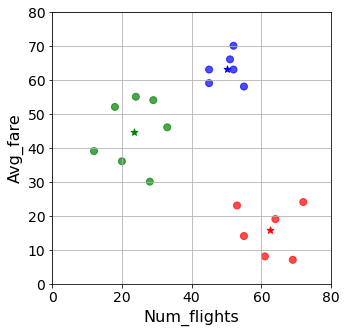

In [21]:
#Plotting the graph
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['Num_flights'], df['Avg_fare'], color=colors1,alpha=0.7)
for idx, centroid in enumerate(sk_centroids):
    plt.scatter(centroid[0], centroid[1], color=colmap[idx+1],marker='*')
plt.xlim(0,80)
plt.ylim(0,80)
plt.xlabel('Num_flights')
plt.ylabel('Avg_fare')
plt.show()

In [22]:
#Here we are trying kmeans on different number of clusters on this dataset
inertia_list = []
for num_clusters in np.arange(1, 11):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [23]:
inertia_list

[13654.210526315788,
 5022.628205128205,
 1624.4285714285716,
 1081.75,
 850.9166666666666,
 647.0833333333333,
 513.5833333333333,
 428.1666666666667,
 315.0833333333333,
 254.66666666666669]

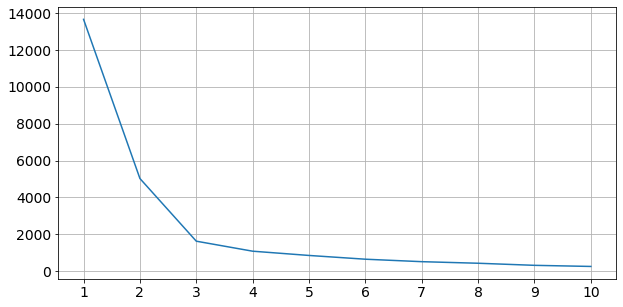

In [24]:
#Plotting the graph for above
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11), inertia_list)
plt.xticks(np.arange(1,11))
plt.grid(True)
plt.show()

Note: If we dont mention the number of cluster then default value of cluster will be 8